- Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, confusion_matrix

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# float display format to 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)# float display format to 2 decimal places

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [148]:
df = pd.read_csv(r'E:\documents\Coding\Machine learning\data for machine learning\heart.csv')

# Data Overview

In [149]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [151]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [152]:
df.shape

(918, 12)

#####

# Data Cleaning 

In [153]:
# Checking null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [154]:
# checing for duplicated values
df.duplicated().sum()

np.int64(0)

In [155]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [156]:
print('The Number of zero values in cholesterol:', df[df['Cholesterol'] <1].count()[0])
print('The mean of cholestrol:', df['Cholesterol'].mean())
print('The median of cholestrol:', df['Cholesterol'].median())

The Number of zero values in cholesterol: 172
The mean of cholestrol: 198.7995642701525
The median of cholestrol: 223.0


In [157]:
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.50,Flat,1


In [158]:
df = df[df['RestingBP'] != 0]

In [159]:
# Replace zero cholesterol values with NaN
df['Cholesterol'].replace(0, np.nan, inplace=True)

# now filling these null values with median of cholestrol
choMean = df['Cholesterol'].median()

df['Cholesterol'] = df['Cholesterol'].fillna(choMean)

In [226]:
# Negative values in Oldpeak
df[df['Oldpeak'] <= 0].shape[0]

381

- According to my research negative values in Oldpeak is not an error
- Oldpeak = 0: No ST segment depression. This is generally normal and indicates that there may not be any significant ischemia during the test.
- Oldpeak > 0: Positive ST segment depression. This suggests the presence of ischemia. The greater the oldpeak value, the more severe the ischemia.

In [161]:
df[df['RestingBP'] <= 1]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [162]:
# Simply replacing zero with mean
df['RestingBP'] = df['RestingBP'].replace(0, 132)

# Basic EDA

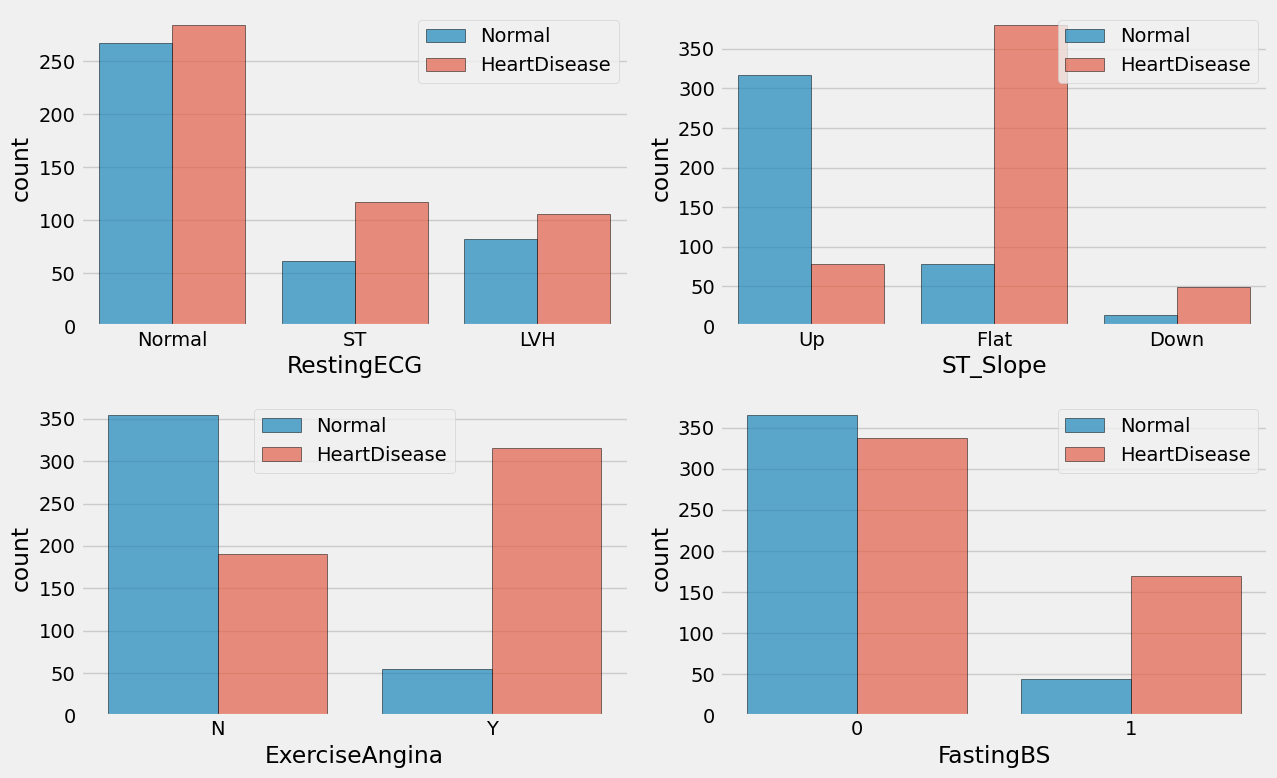

In [ ]:
cate_columns = ['RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

# Figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(13, 8))  # 2 rows, 3 columns
axes = axes.flatten(order='f')

for i, col in enumerate(cate_columns):
    sns.countplot(x=df[col], data=df, ax=axes[i], hue = 'HeartDisease', edgecolor='k', alpha =0.7)
    axes[i].legend(labels=['Normal', 'HeartDisease'])

plt.tight_layout()
plt.show()

In [164]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.00,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180.00,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283.00,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214.00,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195.00,0,Normal,122,N,0.00,Up,0


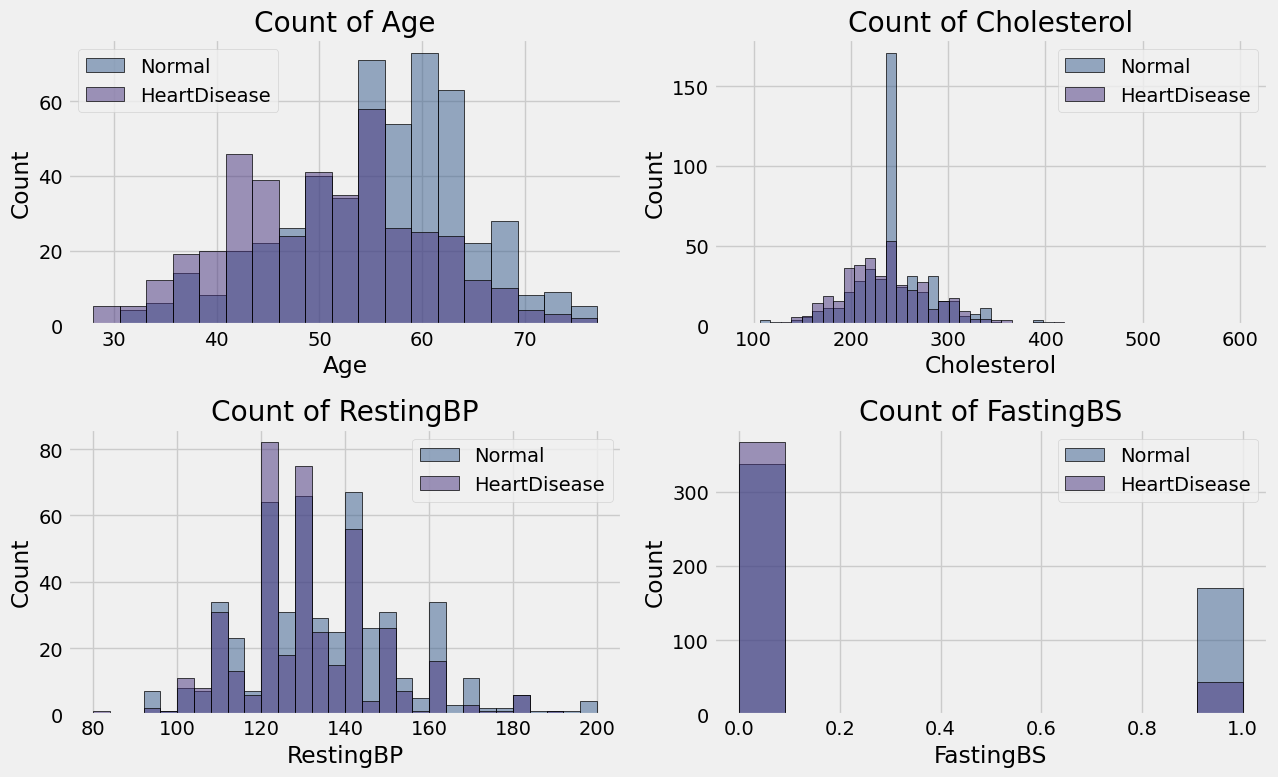

In [ ]:
cate_column = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS']

# Figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(13, 8))  # 2 rows, 2 columns
axes = axes.flatten(order='f')

for i, col in enumerate(cate_column):
    sns.histplot(x=df[col], data=df, ax=axes[i], palette=palette, hue = 'HeartDisease', edgecolor='k')
    axes[i].set_title(f'Count of {col}')
    axes[i].legend(labels=['Normal', 'HeartDisease'])

plt.tight_layout()
plt.show()

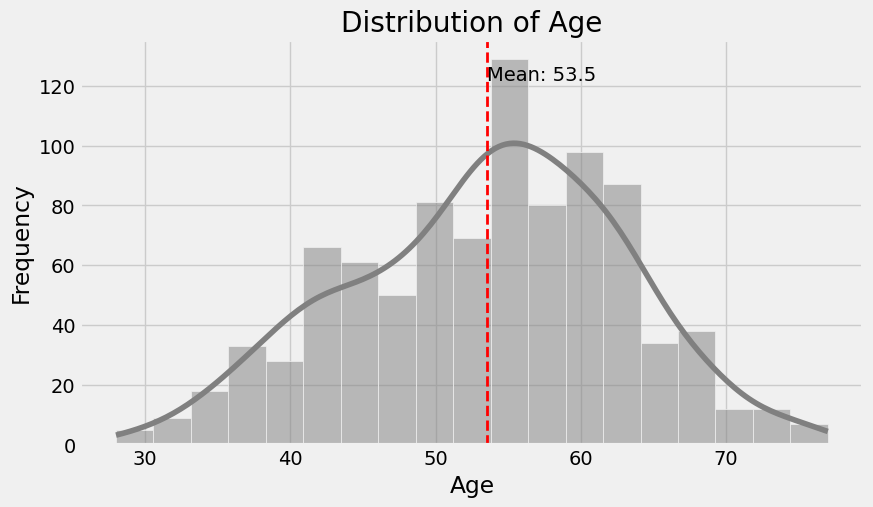

In [166]:
# the mean of the Age column
mean_age = df['Age'].mean()

plt.figure(figsize=(9, 5))
sns.histplot(df['Age'], color='gray', kde=True)

# line for the mean age
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_age, max(plt.gca().get_ylim())*.9, f'Mean: {mean_age:.1f}', color='k')

plt.title('Distribution of Age')
plt.ylabel('Frequency')
plt.show()

# Analyzation Visulization of Each Columns Deeply

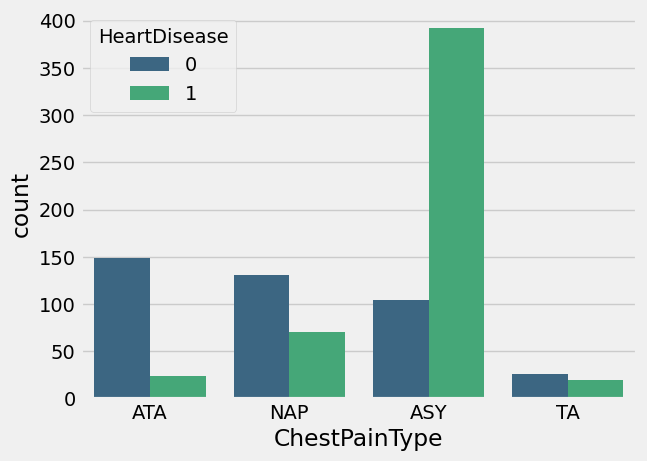

In [167]:
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', palette='viridis')
plt.show()

In [168]:
df.groupby('ChestPainType')['HeartDisease'].value_counts(normalize=True).unstack()


HeartDisease,0,1
ChestPainType,,
ASY,0.21,0.79
ATA,0.86,0.14
NAP,0.65,0.35
TA,0.57,0.43


In [169]:
# Avg age of each CPT
avg_age_cpt = df.groupby('ChestPainType')['HeartDisease'].value_counts

print(f'The average Age of {avg_age_cpt}')

The average Age of <bound method SeriesGroupBy.value_counts of <pandas.core.groupby.generic.SeriesGroupBy object at 0x0000028307A50AD0>>


- This graph shows that people with ASY (asymptomatic) chest pain are much more likely to have heart disease compared to those in the other three categories combined. Plus, their average age is a bit higher than the others.

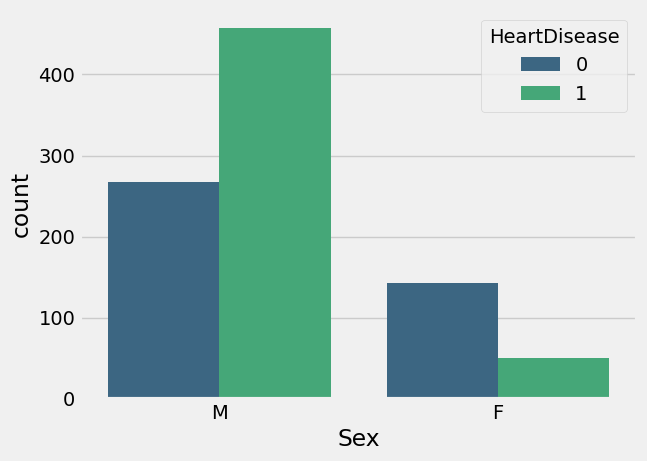

In [170]:

sns.countplot(data=df, x='Sex', hue='HeartDisease', palette='viridis')
plt.show()

In [171]:
# individuals with heart disease
yesHRD = df[df['HeartDisease'] == 1]

# Count males and females with heart disease
gender_counts = yesHRD['Sex'].value_counts()
total_count = len(yesHRD)

# percentage
percentage_male = (gender_counts['M'] / total_count) * 100
percentage_female = (gender_counts['F'] / total_count) * 100

print("Percentage of males with heart disease:", percentage_male)
print("Percentage of females with heart disease:", percentage_female)

Percentage of males with heart disease: 90.13806706114399
Percentage of females with heart disease: 9.861932938856016


- So, according to the graph, people with asymptomatic chest pain (ASY) are way more likely to have heart issues compared to everyone else put together. Also, they tend to be a bit older on average. And get this: a whopping 90% of the Males have heart trouble, while only 9.80% of the Females do. Looks like the guys have it rougher in that department!

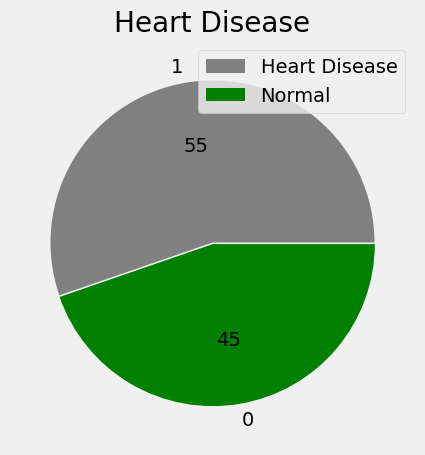

In [172]:
labels=['1','0']
count= df['HeartDisease'].value_counts()
plt.figure(figsize=(6,5))
plt.pie(count,labels=labels,autopct='%.0f', explode=(0,.01), colors=['gray','g'])
plt.legend( ['Heart Disease','Normal'],loc =1)

plt.title('Heart Disease')
plt.show()

In [173]:
No_HRD = df[df['HeartDisease'] == 0]
HRD = df[df['HeartDisease'] == 1]

# List of columns to calculate means for
colss = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

# Calculate and print means
for col in colss:
    No_HRD_Mean = No_HRD.groupby("Sex")[col].mean()
    HRD_Mean = HRD.groupby("Sex")[col].mean()
    
    print(f'Column: {col}')
    print(f'Mean of No Heart Disease by Sex:\n{No_HRD_Mean}\n')
    print(f'Mean of Heart Disease by Sex:\n{HRD_Mean}\n')
    print('-' * 50)

Column: Age
Mean of No Heart Disease by Sex:
Sex
F   51.20
M   50.20
Name: Age, dtype: float64

Mean of Heart Disease by Sex:
Sex
F   56.18
M   55.87
Name: Age, dtype: float64

--------------------------------------------------
Column: RestingBP
Mean of No Heart Disease by Sex:
Sex
F   128.79
M   130.93
Name: RestingBP, dtype: float64

Mean of Heart Disease by Sex:
Sex
F   142.00
M   133.62
Name: RestingBP, dtype: float64

--------------------------------------------------
Column: Cholesterol
Mean of No Heart Disease by Sex:
Sex
F   249.10
M   233.10
Name: Cholesterol, dtype: float64

Mean of Heart Disease by Sex:
Sex
F   270.74
M   244.26
Name: Cholesterol, dtype: float64

--------------------------------------------------
Column: MaxHR
Mean of No Heart Disease by Sex:
Sex
F   149.05
M   147.67
Name: MaxHR, dtype: float64

Mean of Heart Disease by Sex:
Sex
F   137.82
M   126.48
Name: MaxHR, dtype: float64

--------------------------------------------------


- RestingBP: Males tend to have a higher resting blood pressure in no HR disease.
- Cholesterol, Fasting Blood Sugar MaxHR, and Age in both conditions Females generally have higher values in all these categories.

The correlation of Age and HeartDisease: 0.2820117259633897
The correlation of Age and RestingBP: 0.26308444022704647


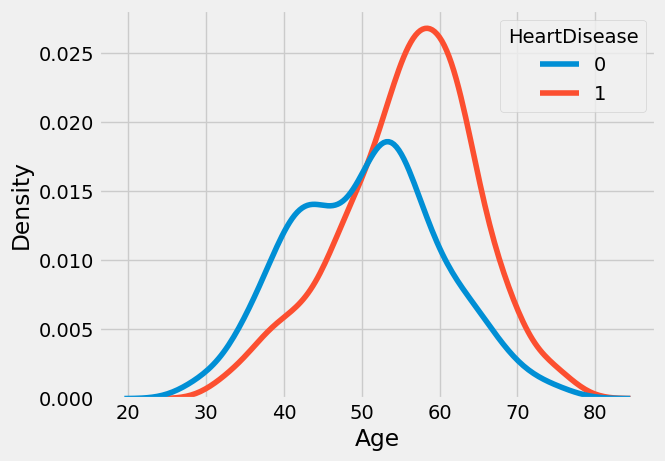

In [174]:
Age_HRcorr = df['Age'].corr(df['HeartDisease'])
print(f'The correlation of Age and HeartDisease: {Age_HRcorr}')

Age_Bpcorr = df['Age'].corr(df['RestingBP'])
print(f'The correlation of Age and RestingBP: {Age_Bpcorr}')

sns.kdeplot(data=df, x='Age', hue='HeartDisease')
plt.show()

The correlation of Age and MaxHR-0.3822795417446562


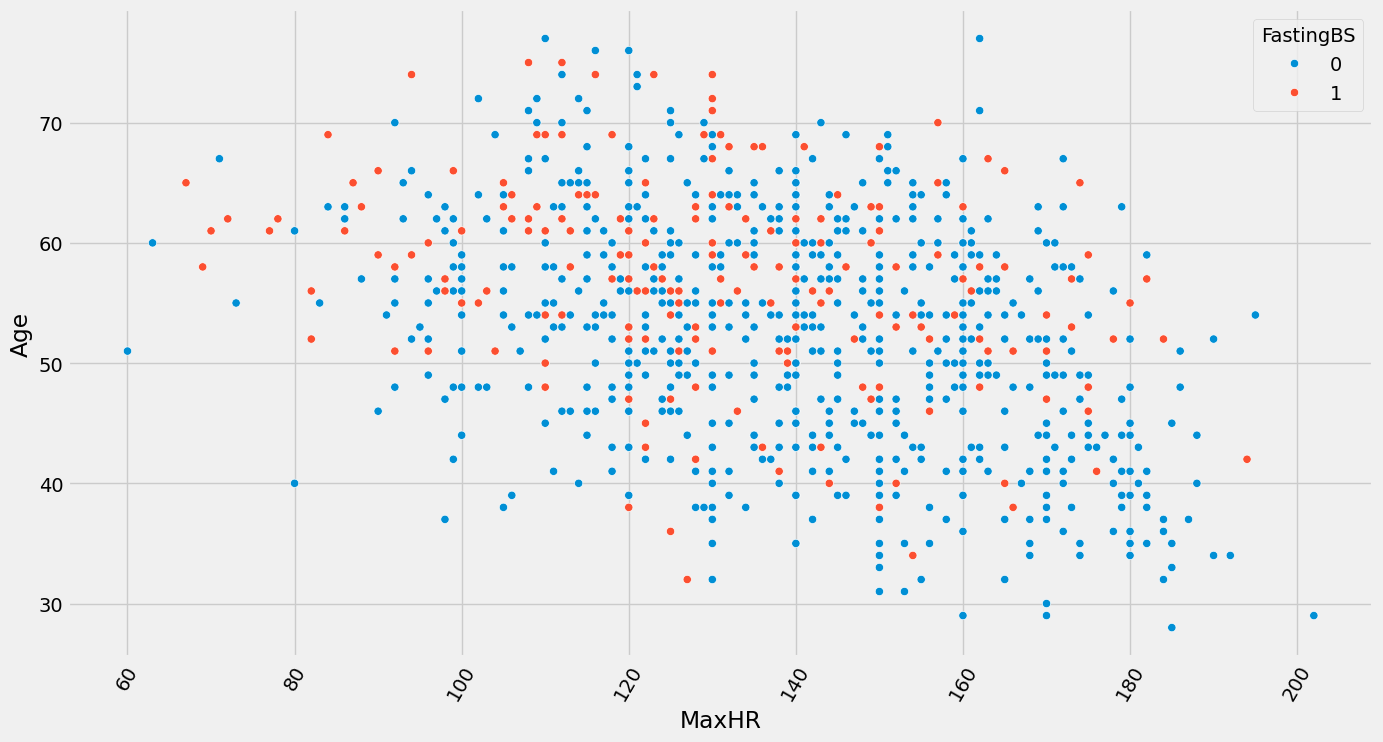

In [175]:
Age_HRcorr = df['Age'].corr(df['MaxHR'])
print(f'The correlation of Age and MaxHR{Age_HRcorr}')

plt.figure(figsize=(15, 8))
sns.scatterplot(x='MaxHR', y='Age', data=df, hue='FastingBS')

plt.xticks(rotation=60)
plt.show()

In [176]:
#correlation between the numerical columns
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
df[numerical_columns].corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.00,0.26,0.05,-0.38,0.26
RestingBP,0.26,1.00,0.09,-0.11,0.17
Cholesterol,0.05,0.09,1.00,-0.00,0.05
MaxHR,-0.38,-0.11,-0.00,1.00,-0.16
Oldpeak,0.26,0.17,0.05,-0.16,1.00


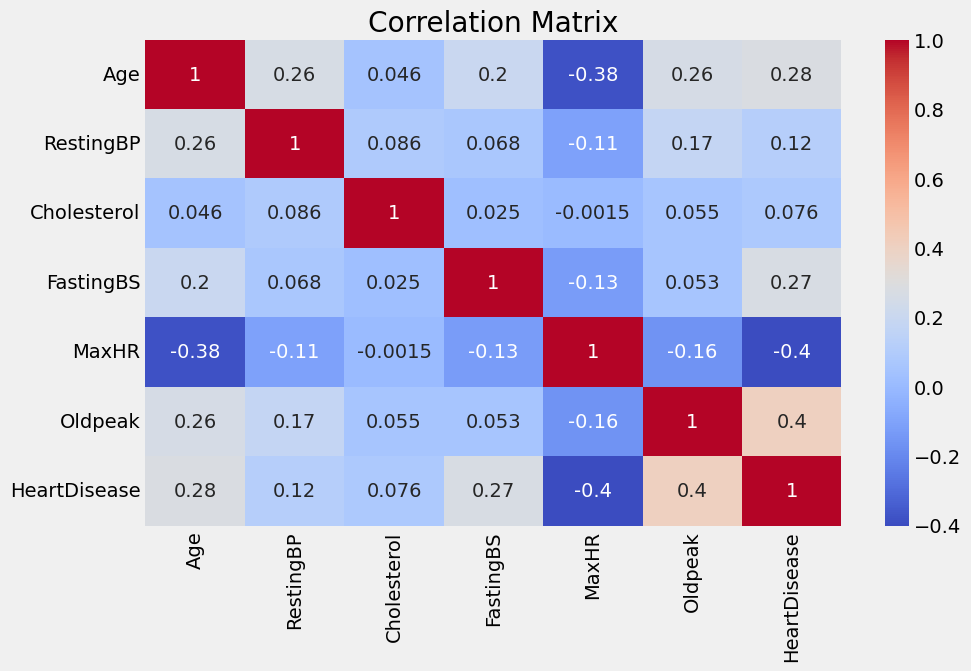

In [177]:
numeric_df = df.select_dtypes(include='number')

# correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [178]:
pd.crosstab(df.Sex,df.HeartDisease)

HeartDisease,0,1
Sex,,
F,143,50
M,267,457


In [179]:
# Assuming df is your DataFrame
resting_ecg_hrd = df.groupby('RestingECG')['HeartDisease'].value_counts(normalize=True).unstack()
print(resting_ecg_hrd)

HeartDisease    0    1
RestingECG            
LVH          0.44 0.56
Normal       0.48 0.52
ST           0.34 0.66


<Axes: xlabel='RestingECG', ylabel='count'>

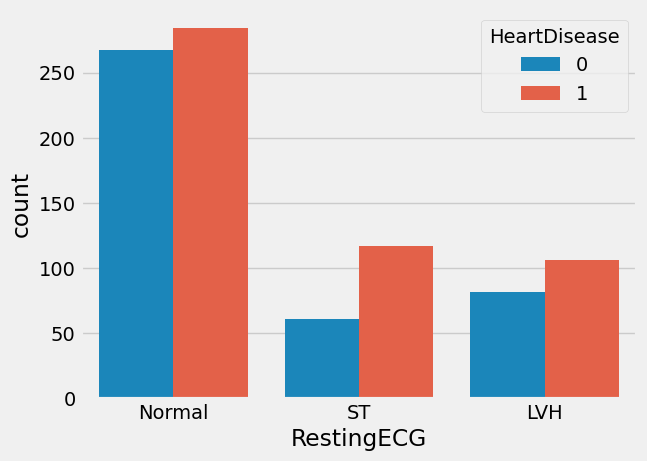

In [180]:
sns.countplot(data= df, x= 'RestingECG', hue='HeartDisease', 
             # kde=True
             )

- i'm really confused that is normal ecg related to heartdisease or no because there lot's of heartdisease values in normal category 
- anyway normal has the highest count of heart disease patient then ST

<Axes: xlabel='ST_Slope', ylabel='Count'>

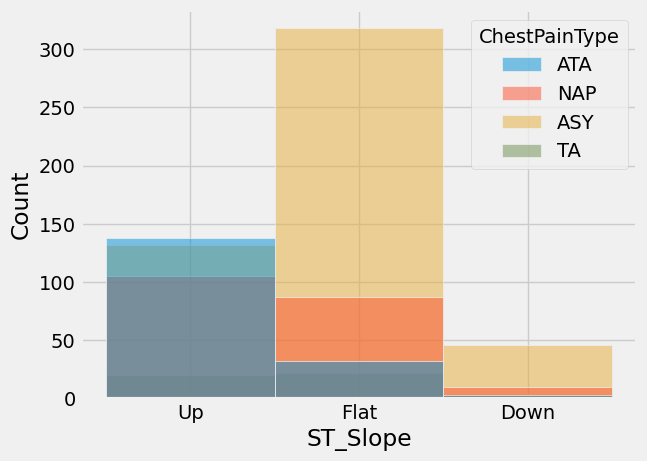

In [181]:
sns.histplot(data= df, x= 'ST_Slope', hue='ChestPainType', common_norm=True, fill=True)

In [182]:
df.groupby('ChestPainType')['HeartDisease'].value_counts(normalize=True).unstack()

HeartDisease,0,1
ChestPainType,,
ASY,0.21,0.79
ATA,0.86,0.14
NAP,0.65,0.35
TA,0.57,0.43


- this Graph shows that when the people are in flat slope mostly they have heart disease and little bit Down
- acoording to my research
- Upsloping: This can sometimes be seen in normal individuals, especially younger people, and might not necessarily indicate a problem. 
- flat: A flat ST segment can indicate ischemia, which is a condition where the heart muscle isn't getting enough blood flow and oxygen, often due to blocked arteries.
- Downsloping: This is often considered a more concerning sign and can indicate significant heart problems, such as severe ischemia or other forms of heart disease.

In [183]:
CPT_mean_cho = df.groupby('ChestPainType')['Cholesterol'].mean().sort_values(ascending=False)
slop_mean_cho = df.groupby('ST_Slope')['Cholesterol'].mean().sort_values(ascending=False)

print("Mean Cholesterol by Chest Pain Type:")
print(CPT_mean_cho)
print("\nMean Cholesterol by ST Slope:")
print(slop_mean_cho)


Mean Cholesterol by Chest Pain Type:
ChestPainType
ASY   246.85
ATA   242.64
NAP   237.13
TA    232.83
Name: Cholesterol, dtype: float64

Mean Cholesterol by ST Slope:
ST_Slope
Flat   247.88
Down   240.46
Up     238.23
Name: Cholesterol, dtype: float64


- the chest pain type asy have the highest avg cholestrol level and st slope falt have the highest avg level of cholestrol according to my analysis those who have these two asy and falt it more higher chance to have heart disease 

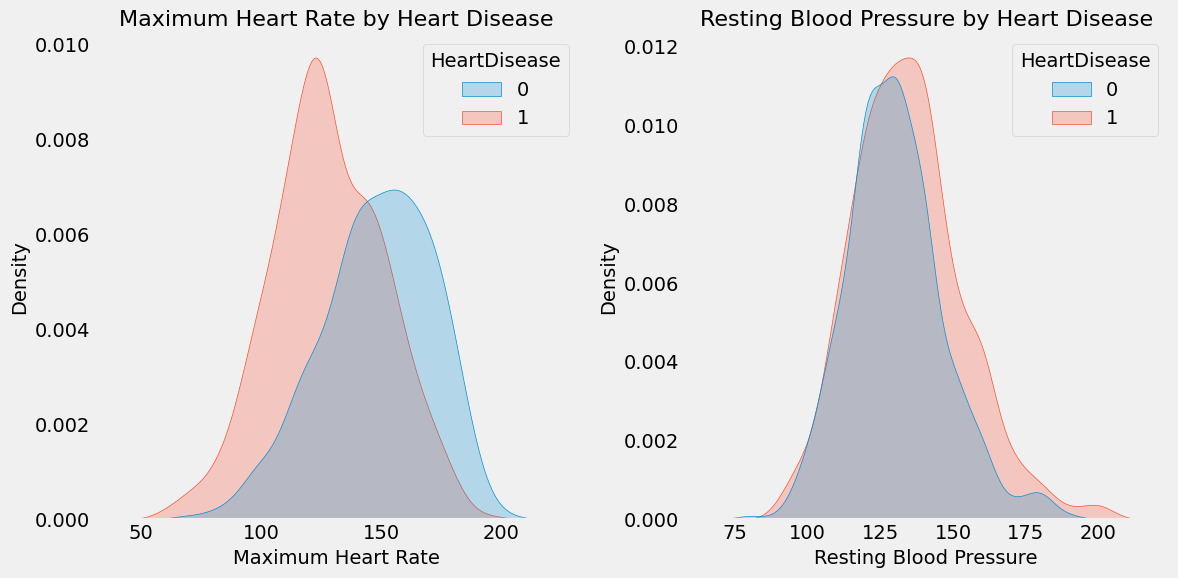

In [184]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# MaxHR
sns.kdeplot(data=df, x='MaxHR', hue='HeartDisease', fill=True, ax=axes[0])
axes[0].set_title('Maximum Heart Rate by Heart Disease', fontsize=16)
axes[0].set_xlabel('Maximum Heart Rate', fontsize=14)
axes[0].set_ylabel('Density', fontsize=14)
axes[0].grid(visible=None)

# RestingBP
sns.kdeplot(data=df, x='RestingBP', hue='HeartDisease', fill=True, ax=axes[1])
axes[1].set_title('Resting Blood Pressure by Heart Disease', fontsize=16)
axes[1].set_xlabel('Resting Blood Pressure', fontsize=14)
axes[1].set_ylabel('Density', fontsize=14)
axes[1].grid(visible=None)

plt.tight_layout()
plt.show()

- These two graphs indicate that heart disease patients are more likely to have a lower MaxHR compared to those without the condition. Additionally, RestingBP does not appear to significantly impact the likelihood of having heart disease.

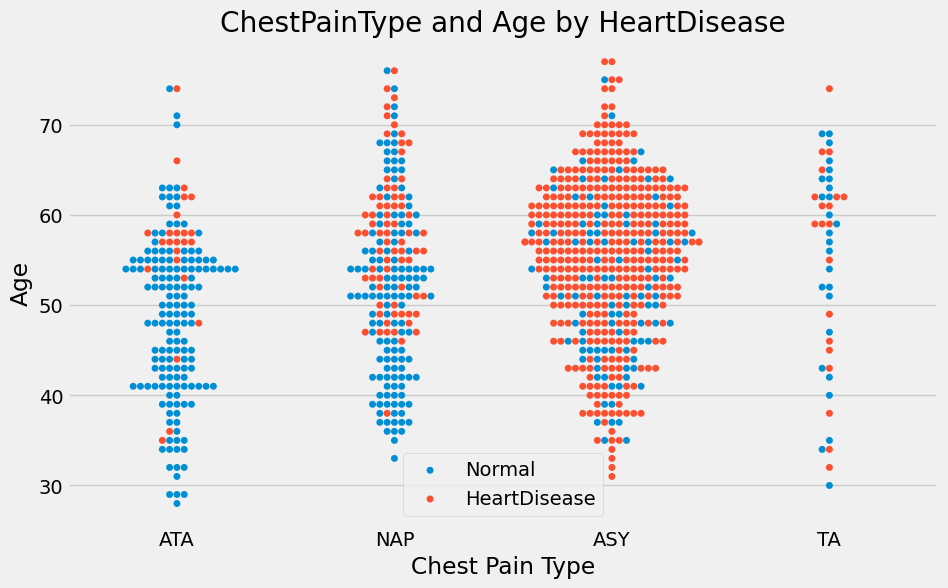

In [185]:
plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'ChestPainType', y = 'Age', data = df, hue='HeartDisease')

#title and labels
plt.title('ChestPainType and Age by HeartDisease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')

plt.legend(labels = ['Normal', 'HeartDisease'])
plt.show()

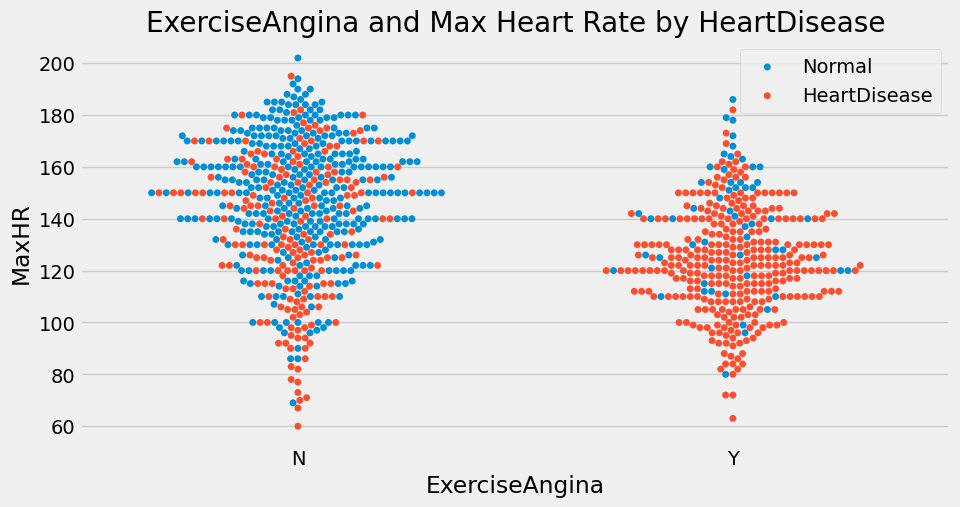

In [186]:
plt.figure(figsize = (10, 5))
sns.swarmplot(x = 'ExerciseAngina', y = 'MaxHR', data = df, hue='HeartDisease')

#title and labels
plt.title('ExerciseAngina and Max Heart Rate by HeartDisease')
plt.legend(labels = ['Normal', 'HeartDisease'])
plt.show()

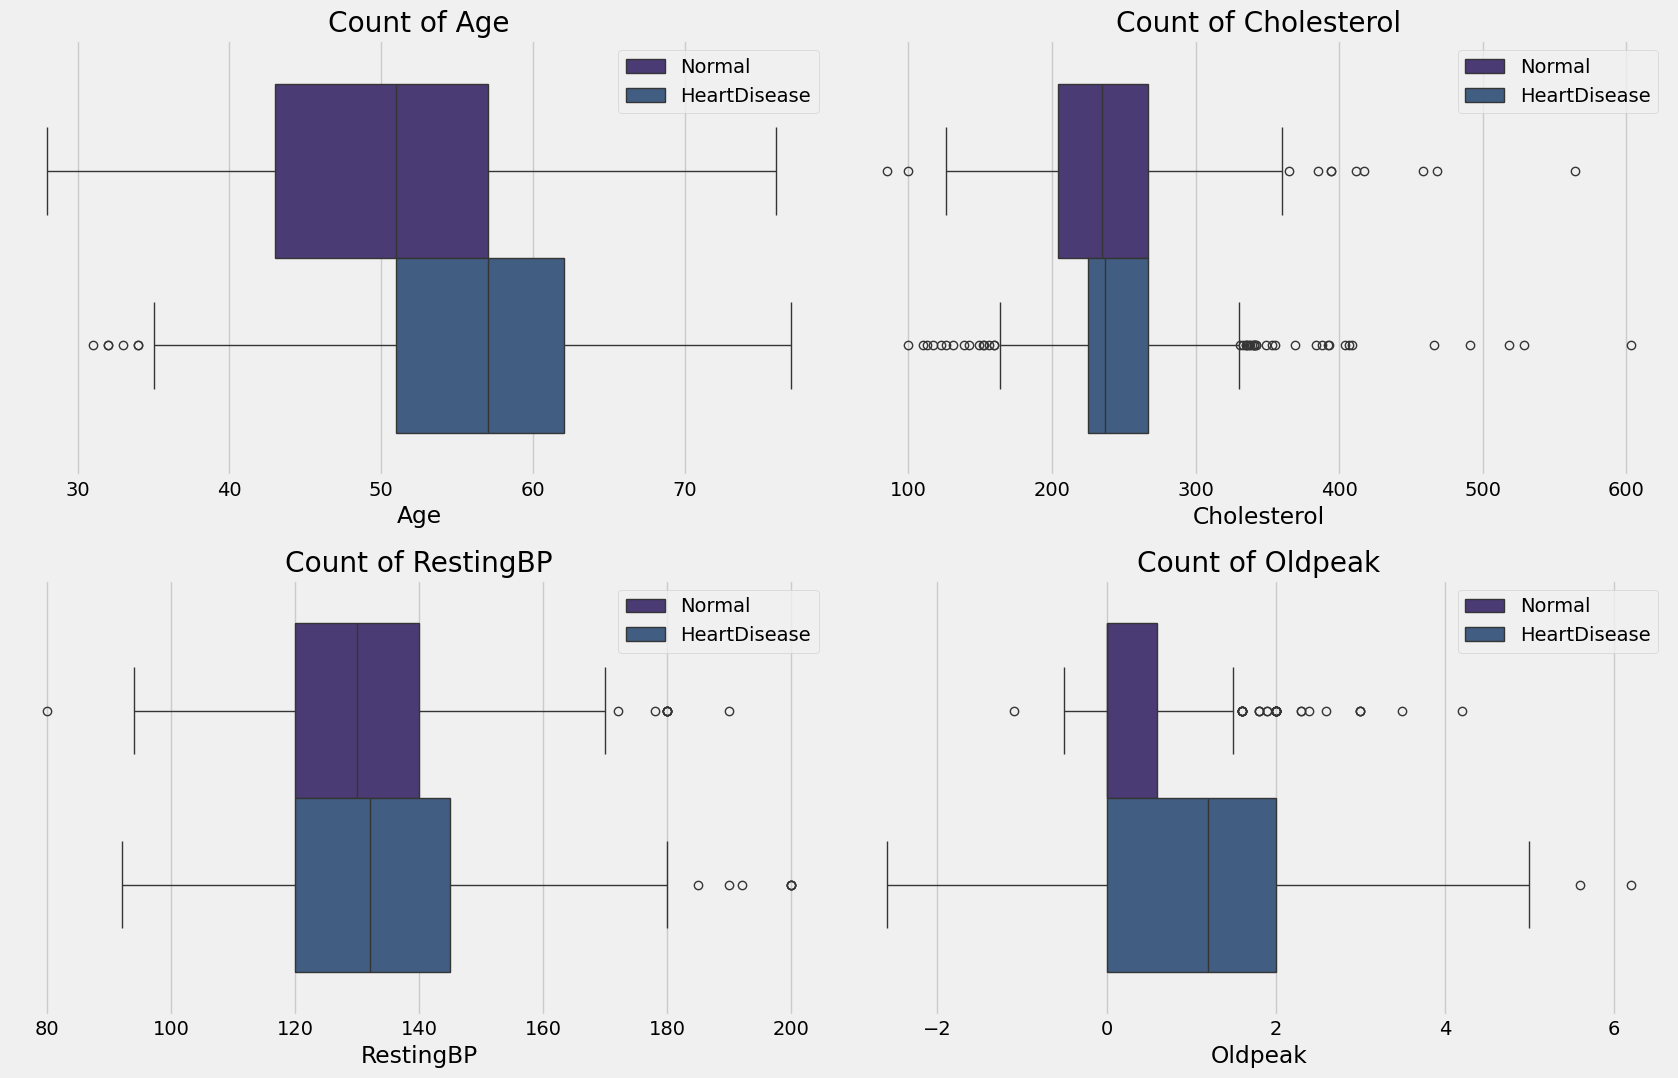

In [187]:
cate_column = ['Age', 'RestingBP', 'Cholesterol', 'Oldpeak']

# Figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(17, 11))  # 2 rows, 3 columns

axes = axes.flatten(order='f')

# color palette
palette = sns.color_palette("viridis")

for i, col in enumerate(cate_column):
    sns.boxplot(x=df[col], data=df, ax=axes[i], palette=palette, hue = 'HeartDisease')#, edgecolor='k')
    axes[i].set_title(f'Count of {col}')
    axes[i].legend(#title='HeartDisease', 
                   labels=['Normal', 'HeartDisease'])

plt.tight_layout()
plt.show()

- there is some outliars in this datasets but i won't remove it now i want to see the score and model performance first

- most of heart disease have asy chest pain and mostly their age is above 50 it seem that mostly the people have heart disease after the age of 50 Percentage of males with heart disease: 90.15748031496062 and Percentage of females with heart disease: 9.84251968503937

- People with heart-related diseases tend to have a lower maximum heart rate compared to those without heart issues, who generally have higher maximum.
and their resting bp is bit higher compare to normal people and also their cholestrol level is bit higher than normal and heart disease patient have flat st slope it also one of the biggest sumptyce and little bit down one as well 
Resting ecg  the type of st it tend have higher chance to have heart disease even the count in the norma ecg is more but also normal people have lots normal esting ecg so and percentage wise st is a bit stronger syptm.
accoring to our analysis when is increasing the maxHR decreasing so it mean maxhR most commly higher in young people 

- The corr between age and heart disease and RestingBP is about 30 percent 

# Model Building:

### Model Pipeline

In [188]:
# column names
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric_columns = [col for col in df.columns if col not in categorical_columns and col != 'HeartDisease']

# Transformers for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Transformers for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Combine transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],
    remainder='passthrough'  # Keep the HeartDisease column
)

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform the data
processed_data = pipeline.fit_transform(df)

In [189]:
'''
#Convert the result back to a DataFrame
encoded_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_columns)
all_feature_names = numeric_columns + list(encoded_feature_names) + ['HeartDisease']
processed_df = pd.DataFrame(processed_data, columns=all_feature_names)
'''

"\n#Convert the result back to a DataFrame\nencoded_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_columns)\nall_feature_names = numeric_columns + list(encoded_feature_names) + ['HeartDisease']\nprocessed_df = pd.DataFrame(processed_data, columns=all_feature_names)\n"

### Traing and Testing Models

#### Split Train and Test

In [190]:
# Target, features
X = df.drop(columns='HeartDisease', axis=1)
Y = df['HeartDisease']

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=3)

In [192]:
ojj =[col for col in X_test.columns if X_test[col].dtype == 'object']

for col in ojj:
    print(f"'{col}': {X_test[col].unique()}")


'Sex': ['M' 'F']
'ChestPainType': ['ASY' 'ATA' 'NAP' 'TA']
'RestingECG': ['LVH' 'Normal' 'ST']
'ExerciseAngina': ['N' 'Y']
'ST_Slope': ['Flat' 'Up' 'Down']


In [193]:
# The name and model dict
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGBClassifier' : XGBClassifier()
     }

### Scoring Each Model

In [194]:
# Define your models in a dictionary
# Initialize the StratifiedKFold
Skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

# Iterate over each model in the dictionary
for name, model in models.items():
    # Define the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        (name, model) ])
    
    # Cross-validation scores
    cv_scores = cross_val_score(pipeline,X, Y, scoring='accuracy', cv=Skf, n_jobs=None)

    # Train the model and Predicting
    pipe_model = pipeline.fit(X_train, Y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)

    print(f'The Accuracy score of {name}: {accuracy}')
    print(f'Mean cross-validation score of {name}: {cv_scores.mean()}')
    print("_"*65)


The Accuracy score of LogisticRegression: 0.8532608695652174
Mean cross-validation score of LogisticRegression: 0.8636909004514137
_________________________________________________________________
The Accuracy score of DecisionTreeClassifier: 0.7228260869565217
Mean cross-validation score of DecisionTreeClassifier: 0.7917082442385365
_________________________________________________________________
The Accuracy score of RandomForestClassifier: 0.8586956521739131
Mean cross-validation score of RandomForestClassifier: 0.870248277500594
_________________________________________________________________
The Accuracy score of GradientBoostingClassifier: 0.8641304347826086
Mean cross-validation score of GradientBoostingClassifier: 0.8647956759325256
_________________________________________________________________
The Accuracy score of KNeighborsClassifier: 0.875
Mean cross-validation score of KNeighborsClassifier: 0.857127583749109
____________________________________________________________

#### Now using these Random_state to get more metric score 

In [195]:
last_models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()}
states = [4, 16]

for model_name, model in last_models.items():
    for state in states:
        stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=state)
        
        # The pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        # Cross-validation scores
        kf_score = cross_val_score(pipeline, X, Y, scoring='accuracy', cv=stratified_kf, n_jobs=-1)
        
        # Train the model
        pipeline.fit(X_train, Y_train)
        
        # Predict on the test set
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1]
        
        # Print classification report
        print(f'Classification Report for {model_name} (random_state={state}):')
        print(f'Cross-Validation Scores: {np.mean(kf_score)}')
        print(classification_report(Y_test, y_pred))
        
        # Compute and print ROC-AUC
        roc_auc = roc_auc_score(Y_test, y_proba)
        print(f'ROC-AUC for {model_name}: {roc_auc:.2f}')
        print("="*65)

Classification Report for RandomForestClassifier (random_state=4):
Cross-Validation Scores: 0.8604656688049417
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        96
           1       0.82      0.91      0.86        88

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

ROC-AUC for RandomForestClassifier: 0.93
Classification Report for RandomForestClassifier (random_state=16):
Cross-Validation Scores: 0.8625980042765502
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        96
           1       0.84      0.91      0.87        88

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

ROC-AUC for RandomForestClassifier: 0.93
Classification Report for GradientBoostin

0.8641304347826086


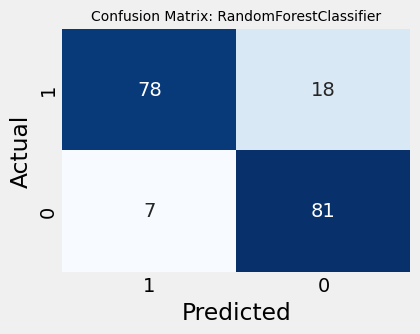

0.8586956521739131


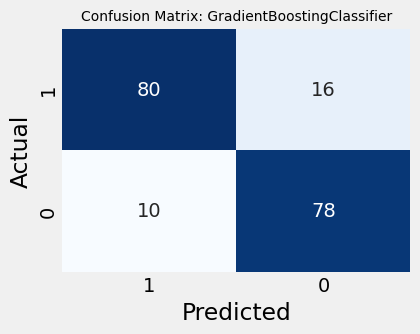

In [196]:
Final_models = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=105),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=150)}


# Train each model, compute the confusion matrix, and plot it
for name, model in Final_models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])    

    pipeline.fit(X_train, Y_train)
    Y_pred = pipeline.predict(X_test)
    
    # Compute the confusion matrix
    matrix = confusion_matrix(Y_test, Y_pred)
    accu = accuracy_score(Y_test, Y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(4, 3))
    print(accu)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {name}', size=10)
    plt.show()

- Based on my practice, I've noticed that the accuracy and overall performance of differnt models changing when I alter the random state in train_test_split. To address this, I want to use the k-fold cross-validation method. This approach will provide results across different data splits, allowing me to observe the average performance of the model. By doing this, I can identify the best-performing model for my data more reliably.

# Hyper Perameter Tuning

- We need to choose between two models: RandomForestClassifier and GradientBoostingClassifier. Both models have demonstrated excellent performance, not only in terms of accuracy but also precision, recall, and F1-score.
- Therefore, Let's proceed with hyperparameter tuning to further enhance their performance and determine the best model.

In [197]:
Models_GB_RFC = {
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
}

# the parameter grid 
params_GB_RFC = {
   'GradientBoostingClassifier': {
        'classifier__n_estimators': np.arange(100, 500, 20),
        'classifier__learning_rate': np.arange(0.01, 0.1, 0.01),
        'classifier__max_depth': np.arange(2, 10)
    },
    'RandomForestClassifier': {
        'classifier__n_estimators': np.arange(100, 500, 20),
        'classifier__max_depth': np.arange(10, 110, 10),
        'classifier__min_samples_split': [2, 3, 4, 5, 7, 9, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
    }
}

for name, model in Models_GB_RFC.items():
    Stratified_GB_RFC = StratifiedKFold(n_splits=5, shuffle=True)#, random_state= 42)

    # Define the pipeline with the current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Initialize RandomizedSearchCV object with the pipeline
    grid_search = RandomizedSearchCV(
        estimator = pipeline,
        param_distributions = params_GB_RFC[name],
        n_iter = 50,  # Number of parameter settings sampled
        n_jobs =-1,  # Use all available cores
        cv = Stratified_GB_RFC,  # 5-fold cross-validation
    )
    
    # Fit the RandomizedSearchCV to the data
    fit = grid_search.fit(X, Y)
    
    print(f'{name}:')
    print(f"Best parameters: {fit.best_params_}")
    print()
    print(f'Best Score= {fit.best_score_}')
    print("="*65)
    

RandomForestClassifier:
Best parameters: {'classifier__n_estimators': np.int64(480), 'classifier__min_samples_split': 3, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': np.int64(30)}

Best Score= 0.871311475409836
GradientBoostingClassifier:
Best parameters: {'classifier__n_estimators': np.int64(100), 'classifier__max_depth': np.int64(2), 'classifier__learning_rate': np.float64(0.09)}

Best Score= 0.871335234022333


# More Inception

### RFR

In [198]:
RFR_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators = 170,  min_samples_split = 2, max_depth =  100, 
                                         min_samples_leaf = 7, criterion='gini',
                                         random_state= 1
                                         )) # , class_weight = "balanced"
])

RFR_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=100, min_samples_leaf=7,
                                        n_estimators=170, random_state=1))])

In [199]:
#RFR_pipeline.score(X_train,Y_train)
rfr_pred = RFR_pipeline.predict(X_test)
accuracy_score(Y_test, rfr_pred)

0.842391304347826

In [200]:
cross_val_score_mean = np.mean(cross_val_score(RFR_pipeline, X, Y, cv=5))
print(cross_val_score_mean)

0.8254514136374436


### GBC

In [201]:
GBC_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators = 180, max_depth= 1, learning_rate= 0.04, 
                                               loss='exponential', min_weight_fraction_leaf = 0.1, 
                                               max_features = 'log2', warm_start =True, tol=0.0002, 
                                               random_state = 1))
])

GBC_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.04,
                                            loss='exponential', max_depth=1,
                                            max_features='log2',
                                            min_weight_fraction_leaf=0.1,
                                            n_estimators=180, random_state=1,
                                            tol=0.0002, warm_start=True))])

### Testing the model before bump

In [202]:
#GBC_pipeline.score(X_train, Y_train)
GBC_pred = GBC_pipeline.predict(X_test)
accuracy_score(GBC_pred, Y_test)

0.8586956521739131

In [203]:
#np.mean(cross_val_score(GBC_pipeline, X_train, Y_train, cv=5))
cross_mean_score = np.mean(cross_val_score(GBC_pipeline, X, Y, cv=5))
print(cross_mean_score)

0.8428902352102637


### Done and saving the Model

In [ ]:
import pickle
# Save the calibrated model to a file
with open('GBC_pipeline.pkl', 'wb') as file:
    pickle.dump(GBC_pipeline, file)

In [ ]:
# Load the calibrated model from the file
with open('df.pkl', 'wb') as file:
    pickle.dump(df, file)